# Importing Libraries.

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Step 1: Prepare the dataset

In [2]:
# Load the dataset
data = pd.read_csv('spam.csv', encoding='latin-1')  
# In this dataset the v1 illustrates the label of spam and ham while the v2 illustrates the content.
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


# Step 2: delete the column 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'.

In [3]:
data = data.loc[:, ~data.columns.str.contains('^Unnamed')]
data.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


# Step 3: Split the dataset into training and testing sets

In [4]:
X_train, X_test, y_train, y_test = train_test_split(data['v2'], data['v1'], test_size=0.2, random_state=42)


# Step 4: Create a machine learning pipeline

In [5]:
pipeline = Pipeline([
    ('vectorizer', CountVectorizer()),  # Convert text into a bag-of-words representation
    ('tfidf', TfidfTransformer()),      # Transform bag-of-words into TF-IDF (Term Frequency-Inverse Document Frequency)
    ('classifier', LogisticRegression(random_state=42))     # Use Naive Bayes classifier (you can try other classifiers as well)
])

# Step 5: Train the model

In [6]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('vectorizer', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('classifier', LogisticRegression(random_state=42))])

# Step 6: Make predictions on the test set

In [7]:
y_pred = pipeline.predict(X_test)

# Step 7: Evaluate the model

In [8]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9659192825112107


In [9]:
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

         ham       0.96      1.00      0.98       965
        spam       0.99      0.75      0.86       150

    accuracy                           0.97      1115
   macro avg       0.98      0.88      0.92      1115
weighted avg       0.97      0.97      0.96      1115



In [10]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Confusion Matrix:
[[964   1]
 [ 37 113]]


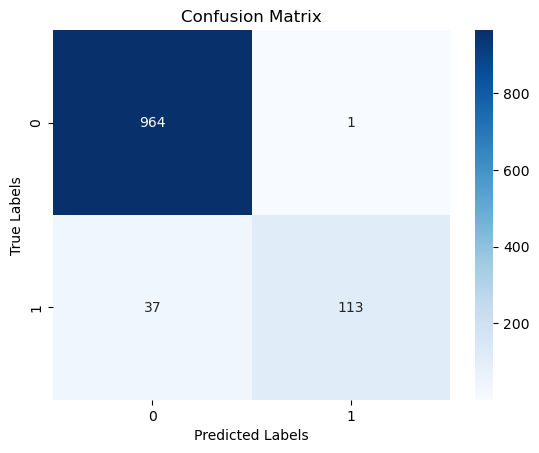

In [11]:
# Confusion Matrix Heatmap
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()